In [246]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Thu Dec  6 15:30:09 2018

@author: bukowskio
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime
from sklearn.cluster import KMeans
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor, BernoulliRBM
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Input, LSTM, SimpleRNN
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras.models import Model
from keras import regularizers
from keras import backend as K
import warnings
warnings.filterwarnings('ignore')

In [282]:
df=pd.read_csv('~/Oskar/customer-analysis/olist_customers_dataset.csv')

In [283]:
df1=pd.read_csv('~/Oskar/customer-analysis/olist_orders_dataset.csv')

In [284]:
df4=pd.read_csv('~/Oskar/customer-analysis/olist_order_items_dataset.csv')

In [285]:
df.shape

(99441, 5)

In [304]:
df1.shape

(99441, 8)

In [305]:
df4.shape

(112650, 9)

In [306]:
len(df4['order_id'].unique())

98666

In [286]:
df.columns

Index([u'customer_id', u'customer_unique_id', u'customer_zip_code_prefix',
       u'customer_city', u'customer_state'],
      dtype='object')

In [287]:
df[['customer_id','customer_unique_id']].sort_values(by='customer_unique_id')

,customer_id,customer_unique_id
64012,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2
24570,4cb282e167ae9234755102258dd52ee8,0000b849f77a49e4a4ce2b2a4ca5be3f
40832,9b3932a6253894a02c1df9d19004239f,0000f46a3911fa3c0805444483337064
57118,914991f0c02ef0843c0e7010c819d642,0000f6ccb0745a6a4b88665a16c9f078
81150,47227568b10f5f58a524a75507e6992c,0004aac84e0df4da2b147fca70cf8255
11102,4a913a170c26e3c8052ed0202849b5a8,0004bd2a26a76fe21f786e4fbd80607f
29513,d2509c13692836fc0449e88cf9eb4858,00050ab1314c0e55a6ca13cf7181fecf
63263,a81ebb9b32f102298c0c89635b4b3154,00053a61a98854899e70ed204dd4bafe
58742,3b37fb626fdf46cd99d37ec62afa88ff,0005e1862207bf6ccc02e4228effd9a0
11996,c59e8ff99836e90d8b457d4122dc34e9,0005ef4cd20d2893f0d9fbd94d3c0d97


In [288]:
len(df['customer_id'].unique())

99441

In [289]:
len(df['customer_unique_id'].unique())

96096

In [290]:
df['customer_city'].value_counts()[0:10]

sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_city, dtype: int64

In [291]:
df1.shape

(99441, 8)

In [292]:
df1.columns

Index([u'order_id', u'customer_id', u'order_status',
       u'order_purchase_timestamp', u'order_approved_at',
       u'order_delivered_carrier_date', u'order_delivered_customer_date',
       u'order_estimated_delivery_date'],
      dtype='object')

In [293]:
df.columns

Index([u'customer_id', u'customer_unique_id', u'customer_zip_code_prefix',
       u'customer_city', u'customer_state'],
      dtype='object')

In [294]:
df4.shape

(112650, 7)

In [295]:
df4.columns

Index([u'order_id', u'order_item_id', u'product_id', u'seller_id',
       u'shipping_limit_date', u'price', u'freight_value'],
      dtype='object')

In [296]:
df4['total_price']=df4['order_item_id']*df4['price']

In [297]:
df4['total_order_value']=df4['total_price']+df4['order_item_id']*df4['freight_value']

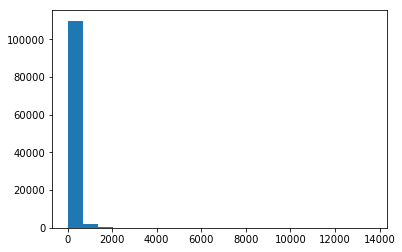

In [298]:
plt.hist(df4['total_order_value'],bins=20)
plt.show()

In [299]:
df4[['order_id','order_item_id','price','freight_value']].sort_values(by='order_item_id',ascending=False)

,order_id,order_item_id,price,freight_value
57317,8272b63d03f5f79c56e9e4120aec44ef,21,7.80,6.57
57316,8272b63d03f5f79c56e9e4120aec44ef,20,1.20,7.89
11951,1b15974a0141d54e36626dca3fdc731a,20,100.00,10.12
75122,ab14fdcfbe524636d65ee38360e22ce8,20,98.70,14.44
75121,ab14fdcfbe524636d65ee38360e22ce8,19,98.70,14.44
57315,8272b63d03f5f79c56e9e4120aec44ef,19,1.20,7.89
11950,1b15974a0141d54e36626dca3fdc731a,19,100.00,10.12
75120,ab14fdcfbe524636d65ee38360e22ce8,18,98.70,14.44
11949,1b15974a0141d54e36626dca3fdc731a,18,100.00,10.12
57314,8272b63d03f5f79c56e9e4120aec44ef,18,1.20,7.89


In [300]:
df3=df.merge(df1,on='customer_id')

In [301]:
df3.columns

Index([u'customer_id', u'customer_unique_id', u'customer_zip_code_prefix',
       u'customer_city', u'customer_state', u'order_id', u'order_status',
       u'order_purchase_timestamp', u'order_approved_at',
       u'order_delivered_carrier_date', u'order_delivered_customer_date',
       u'order_estimated_delivery_date'],
      dtype='object')

In [302]:
df3.shape

(99441, 12)

In [303]:
df4.columns

Index([u'order_id', u'order_item_id', u'product_id', u'seller_id',
       u'shipping_limit_date', u'price', u'freight_value', u'total_price',
       u'total_order_value'],
      dtype='object')

In [269]:
df4_agg=pd.pivot_table(df4,index='order_id',values=['order_item_id','product_id','price'],
                       aggfunc=('sum','count','mean'))

In [270]:
df4_agg=df4.groupby('order_id').aggregate({'order_item_id':np.sum, 'product_id':len, 'price':np.mean})

In [271]:
df4_agg=df4_agg.reset_index()

In [277]:
df4_agg

,order_id,price,product_id,order_item_id
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,1,1
1,00018f77f2f0320c557190d7a144bdd3,239.90,1,1
2,000229ec398224ef6ca0657da4fc703e,199.00,1,1
3,00024acbcdf0a6daa1e931b038114c75,12.99,1,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,1,1
5,00048cc3ae777c65dbb7d2a0634bc1ea,21.90,1,1
6,00054e8431b9d7675808bcb819fb4a32,19.90,1,1
7,000576fe39319847cbb9d288c5617fa6,810.00,1,1
8,0005a1a1728c9d785b8e2b08b904576c,145.95,1,1
9,0005f50442cb953dcd1d21e1fb923495,53.99,1,1


In [278]:
df4_agg.shape

(98666, 4)

In [279]:
df3.shape

(99441, 12)

In [307]:
df3.columns

Index([u'customer_id', u'customer_unique_id', u'customer_zip_code_prefix',
       u'customer_city', u'customer_state', u'order_id', u'order_status',
       u'order_purchase_timestamp', u'order_approved_at',
       u'order_delivered_carrier_date', u'order_delivered_customer_date',
       u'order_estimated_delivery_date'],
      dtype='object')

In [308]:
df31=df3[df3['order_status']=='delivered']

In [309]:
df31.shape

(96478, 12)

In [280]:
df5=df3.merge(df4_agg,on='order_id')

In [281]:
df5_agg=df5.agg()

AttributeError: 'DataFrame' object has no attribute 'agg'

In [ ]:
df3['order_status'].unique()

In [ ]:
df3.columns

In [ ]:
df3['order_purchase_timestamp'][0]-datetime.datetime.utcnow()

In [ ]:
df3['order_date2']=df3['order_purchase_timestamp'].map(lambda x: datetime.datetime.strptime(x[0:10],"%Y-%m-%d"))

In [ ]:
df3['retency']=df3['order_date2'].map(lambda x: (datetime.datetime.utcnow()-x).days)

In [ ]:
df3['retency'].hist()
plt.show()

In [ ]:
datetime.datetime.strptime(df3['order_purchase_timestamp'][0][0:10], "%Y-%m-%d")

In [ ]:
df3_agg1=pd.pivot_table(df3,index='customer_unique_id',values=['order_id'],aggfunc=len)

In [ ]:
df3_agg1.shape

In [ ]:
df3_agg1.sort_values(by='order_id',ascending=False)

In [ ]:
df3_agg2=pd.pivot_table(df3,index='customer_unique_id',values=['retency'],aggfunc=min)

In [ ]:
df3_agg2.hist()
plt.show()

In [ ]:
df3_agg2=pd.pivot_table(df3,index='customer_unique_id',values=['total_price'],aggfunc=np.mean)